## Exploratory Data Analysis in Python by Team 11
### Team Members
1. Janani Srinivasan
2. Monisha B R
3. Praveenkumar
4. Varsha
5. Viswanath Viralam Ramamurthy

#### About the Data Set
This dataset is designed for heart disease prediction and integrates both traditional medical indicators and an additional QuantumPatternFeature. The dataset includes key clinical attributes such as Age, Gender, Blood Pressure, Cholesterol, and Heart Rate, which are commonly used in cardiovascular risk assessment.

The QuantumPatternFeature introduces an additional layer of complexity by capturing intricate, non-linear relationships. This feature enhances the dataset’s potential for advanced predictive modeling, allowing researchers to explore new approaches in both classical and quantum machine learning.

With 500+ samples, this dataset provides a well-structured foundation for testing various machine learning techniques, feature importance analysis, and model interpretability in medical diagnosis.

Source : https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum

P.S : Dataset has been modified to fit some of the needed usecases like removing Duplicates and filling with Nulls / near match values.

#### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Loading Datasets

In [78]:
# Lets read the Dataset which contains the Heard Prediction (Quantum)
dataset_filename = "Dataset.csv"
try:
    df1=pd.read_csv(dataset_filename)
    df1
except FileNotFoundError:
    print("Error: '{}' not found.  Make sure the file is in the correct directory.".format(dataset_filename))
    assert(False)

#### Data Shape, Data Types

In [81]:
# Lets understand the Shape of the data in the dataset
print("Shape of the dataset : {}".format(df1.shape))
print("This Dataset contains {} rows and {} columns".format(df1.shape[0], df1.shape[1]))

Shape of the dataset : (506, 7)
This Dataset contains 506 rows and 7 columns


In [83]:
print("Columns with Datatypes list :" )
print(df1.dtypes)

Columns with Datatypes list :
Age                        int64
Gender                    object
BloodPressure            float64
Cholesterol                int64
HeartRate                  int64
QuantumPatternFeature    float64
HeartDisease              object
dtype: object


In [85]:
print("Info :")
df1.info()

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    506 non-null    int64  
 1   Gender                 506 non-null    object 
 2   BloodPressure          505 non-null    float64
 3   Cholesterol            506 non-null    int64  
 4   HeartRate              506 non-null    int64  
 5   QuantumPatternFeature  506 non-null    float64
 6   HeartDisease           506 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 27.8+ KB


#### Summary Statistics of the Dataset

In [88]:
summary_statistics = df1.describe (include="all")
summary_statistics

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,506.000000,506,505.000000,506.000000,506.000000,506.000000,506
unique,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,Female,NaN,NaN,NaN,NaN,Yes
freq,NaN,270,NaN,NaN,NaN,NaN,303
mean,54.869565,NaN,132.855446,222.529644,88.701581,8.310510,NaN
std,14.290854,NaN,26.436749,47.813997,17.703943,0.923753,NaN
min,30.000000,NaN,90.000000,150.000000,40.000000,6.164692,NaN
25%,43.000000,NaN,111.000000,183.000000,73.000000,7.658902,NaN
50%,55.000000,NaN,132.000000,221.000000,89.000000,8.323064,NaN
75%,66.000000,NaN,155.000000,258.750000,103.750000,8.936850,NaN


#### Checking for Missing Values using 'List Comprehensions'

In [91]:
missing_columns = [col for col in df1.columns if df1[col].isnull().sum() > 0]
missing_columns_count = [df1[col].isnull().sum() for col in df1.columns if df1[col].isnull().sum() > 0]
print("The following columns contains null values")
print(missing_columns)
print(missing_columns_count)

The following columns contains null values
['BloodPressure']
[1]


#### Filling n/a for Missing Values

In [94]:
df1_filled = df1.fillna("N/A")
filled_values = df1.isnull().sum()
filled_values = filled_values[filled_values > 0]

df1_filled.head(), filled_values

(   Age  Gender BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
 0   68    Male         105.0          191        107               8.362241   
 1   58  Female          97.0          249         89               9.249002   
 2   44  Female          93.0          190         82               7.942542   
 3   72    Male          93.0          183        101               6.495155   
 4   37  Female         145.0          166        103               7.653900   
 
   HeartDisease  
 0          Yes  
 1           No  
 2          Yes  
 3          Yes  
 4          Yes  ,
 BloodPressure    1
 dtype: int64)

#### Verifying null values replaced with n/a

In [97]:
values_after_change = df1_filled.isnull().sum()
values_after_change

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

#### Find the duplicate rows

In [100]:
Duplicate_rows = df1[df1.duplicated()]

In [102]:
print("\n Duplicate rows:")
Duplicate_rows


 Duplicate rows:


,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
87,37,Female,145.0,166,103,7.653900,Yes
88,50,Male,114.0,271,73,8.631604,No
502,72,Female,135.0,152,91,6.515717,Yes
503,66,Female,105.0,276,98,9.159122,No
504,41,Female,164.0,248,114,9.067889,No


In [104]:
print("\n 🔹 Number of duplicate rows:")
# num_duplicates = duplicate_rows.shape[0]
num_duplicates = df1.duplicated().sum()
num_duplicates


 🔹 Number of duplicate rows:


5

#### Removing the duplicate rows

In [107]:
df1.drop_duplicates(inplace=True)
df1

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,Male,105.0,191,107,8.362241,Yes
1,58,Female,97.0,249,89,9.249002,No
2,44,Female,93.0,190,82,7.942542,Yes
3,72,Male,93.0,183,101,6.495155,Yes
4,37,Female,145.0,166,103,7.653900,Yes
...,...,...,...,...,...,...,...
498,41,Female,164.0,248,114,9.067889,No
499,45,Male,159.0,175,75,8.718708,No
500,55,Female,107.0,157,101,7.337650,Yes
501,55,Female,174.0,249,89,10.492950,No


#### Statistics for Numerical Columns

In [110]:
print("\n 🔹Numerical Summary:")
df1.describe()


 🔹Numerical Summary:


,Age,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
count,501.000000,500.000000,501.000000,501.000000,501.000000
mean,54.886228,132.858000,222.528942,88.630739,8.311557
std,14.295630,26.483742,47.759666,17.725501,0.922905
min,30.000000,90.000000,150.000000,40.000000,6.164692
25%,43.000000,110.750000,183.000000,73.000000,7.665244
50%,55.000000,131.500000,221.000000,89.000000,8.319011
75%,66.000000,155.000000,258.000000,104.000000,8.935573
max,79.000000,179.000000,497.000000,119.000000,10.784886


#### Statistics for Categorical Columns

In [113]:
categorical_summary = df1.describe(include=["object"])
print("\n 🔹Categorical Summary:")
categorical_summary



 🔹Categorical Summary:


,Gender,HeartDisease
count,501,501
unique,2,2
top,Female,Yes
freq,266,301


#### Group by 'Gender' and 'HeartDisease' to get aggregate statistics for all numerical columns using 'User-Defined function'

In [116]:
def get_grouped_stats(df1, group_by_column):

    if group_by_column not in df1.columns:
        return f"Column '{group_by_column}' not found in dataset."

    # Group by the specified column and compute aggregate statistics
    grouped_stats = df1.groupby(group_by_column).agg({
        "Age": ["mean", "median", "std"],
        "Cholesterol": ["mean", "median", "std"],
        "HeartRate": ["mean", "median", "std"],
        "QuantumPatternFeature": ["mean", "median", "std"]
    })

    return grouped_stats

# Example Usage:
age_stats_by_gender = get_grouped_stats(df1, "Gender")
age_stats_by_heart_disease = get_grouped_stats(df1, "HeartDisease")

# Display Age based on Gender
print("\n🔹 Age & Health Stats by Gender:\n", age_stats_by_gender)




🔹 Age & Health Stats by Gender:
               Age                   Cholesterol                    HeartRate  \
             mean median        std        mean median        std       mean   
Gender                                                                         
Female  55.146617   56.0  14.655192  221.522556  218.0  49.044160  88.718045   
Male    54.591489   55.0  13.902712  223.668085  221.0  46.340717  88.531915   

                         QuantumPatternFeature                      
       median        std                  mean    median       std  
Gender                                                              
Female   90.0  17.769154              8.293876  8.293207  0.980023  
Male     88.0  17.713353              8.331570  8.386286  0.855304  


In [118]:
# Diplay Age based on Heart Disease

print("\n 🔹Age & Health Stats by Heart Disease:\n", age_stats_by_heart_disease)


 🔹Age & Health Stats by Heart Disease:
                     Age                   Cholesterol                    \
                   mean median        std        mean median        std   
HeartDisease                                                              
No            50.375000   51.0  10.698912  246.760000  252.5  45.847052   
Yes           57.883721   62.0  15.559448  206.428571  199.0  41.902654   

              HeartRate                   QuantumPatternFeature            \
                   mean median        std                  mean    median   
HeartDisease                                                                
No            90.920000   93.0  17.207092              9.188250  9.067805   
Yes           87.109635   86.0  17.928690              7.729036  7.781560   

                        
                   std  
HeartDisease            
No            0.535303  
Yes           0.613721  


#### Categorizing Age into bins using a 'Lambda Function'

In [121]:
df1["Age_Group"] = df1["Age"].apply(lambda x:
    "Young" if x < 40 else
    "Middle-aged" if 40 <= x < 60 else
    "Senior"
)

# Display the first 5 rows with the new Age_Group column
df1[["Age", "Age_Group"]].head()

,Age,Age_Group
0,68,Senior
1,58,Middle-aged
2,44,Middle-aged
3,72,Senior
4,37,Young


In [123]:
df1["QPF_Level"] = df1["QuantumPatternFeature"].apply(lambda x:
    "Low" if x < 7 else
    "Medium" if 7 <= x < 9 else
    "High"
)

# Display the first 5 rows with the new QPF_Level column
df1[["QuantumPatternFeature", "QPF_Level"]].head()

,QuantumPatternFeature,QPF_Level
0,8.362241,Medium
1,9.249002,High
2,7.942542,Medium
3,6.495155,Low
4,7.653900,Medium


#### Data Visualization

##### Histograms


 Histogram for Numerical Columns:


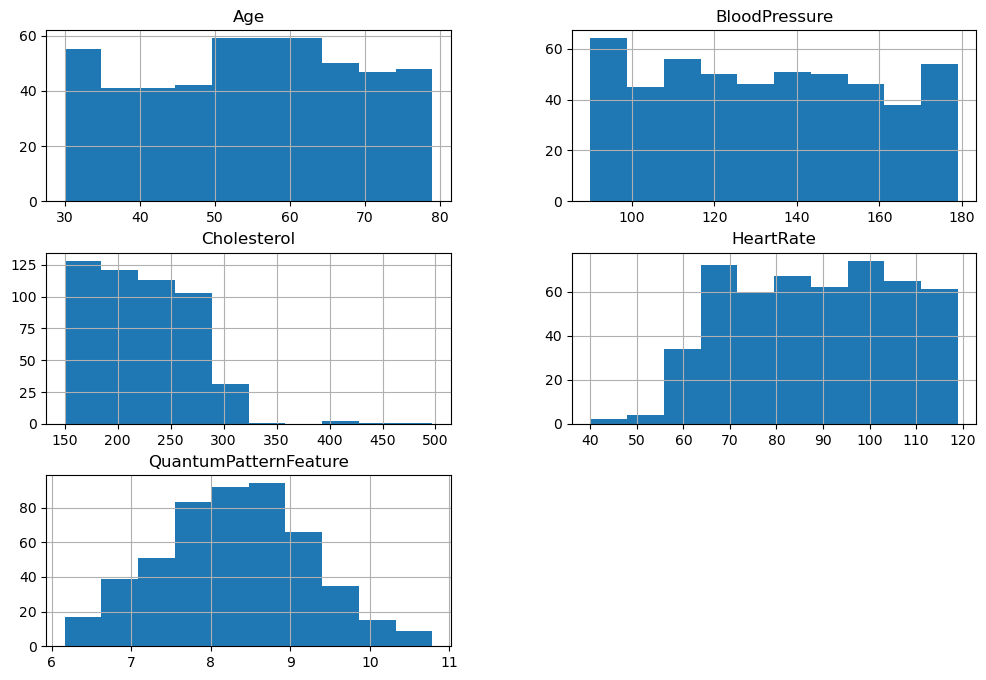

In [127]:
print("\n Histogram for Numerical Columns:")
df1.hist(figsize=(12,8))
plt.show()

##### Barplots


 Bar plots of categorical features:


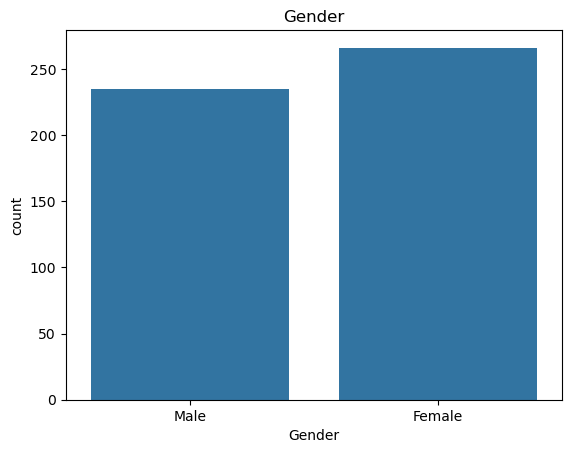

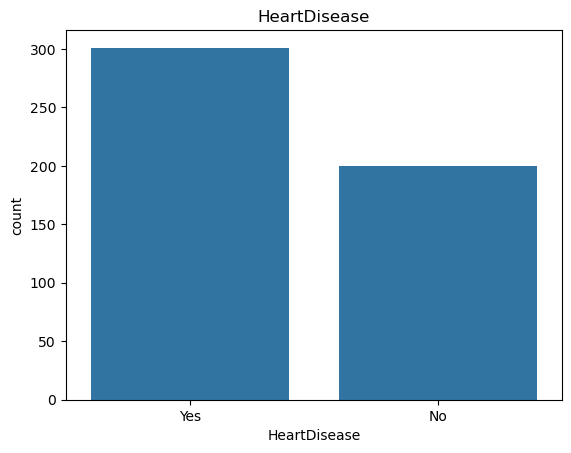

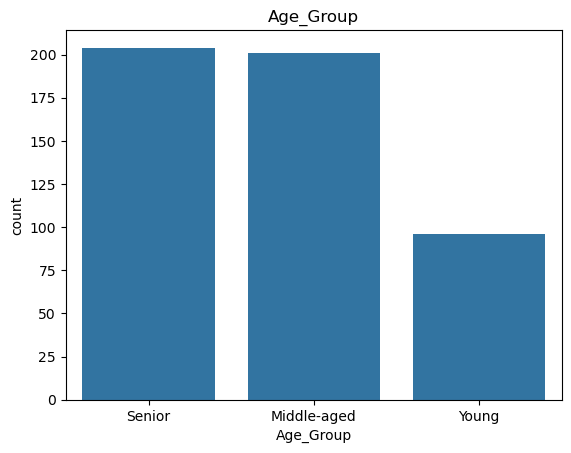

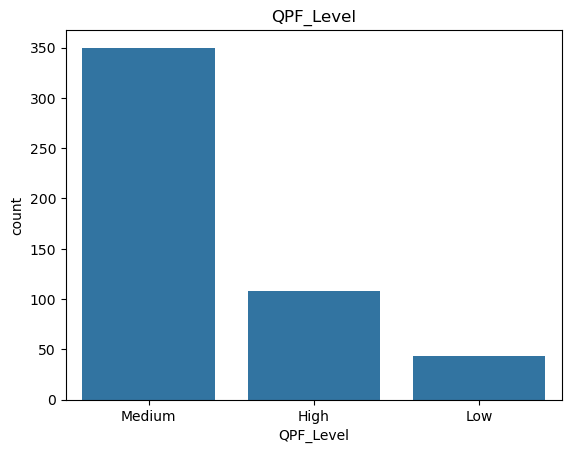

In [129]:
print("\n Bar plots of categorical features:")
for col in df1.select_dtypes(include=['object']).columns:
    sns.countplot(x=col, data=df1)
    plt.title(f'{col}')
    plt.show()

##### Box Plots to identify Outliers (example taken in this plot is heart disease and QPF )

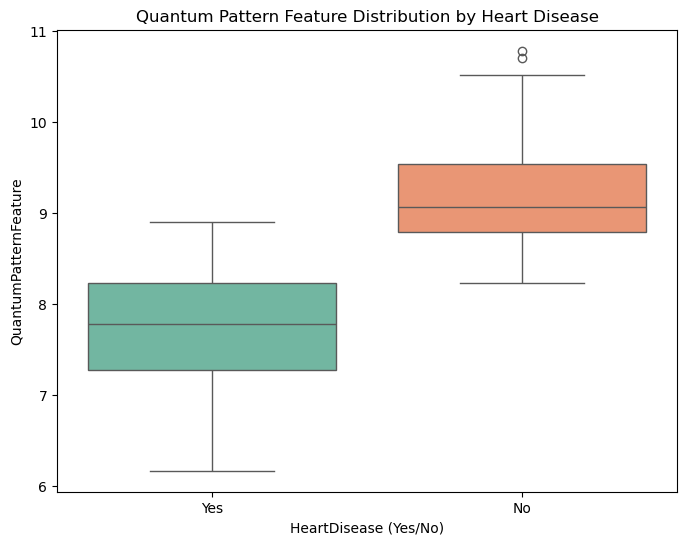

In [132]:
# Boxplot to analyze Quantum Pattern Feature distribution across heart disease cases

plt.figure(figsize=(8, 6))
sns.boxplot(x=df1["HeartDisease"], y=df1["QuantumPatternFeature"], palette="Set2")
plt.xlabel("HeartDisease (Yes/No)")
plt.ylabel("QuantumPatternFeature")
plt.title("Quantum Pattern Feature Distribution by Heart Disease")
plt.show()

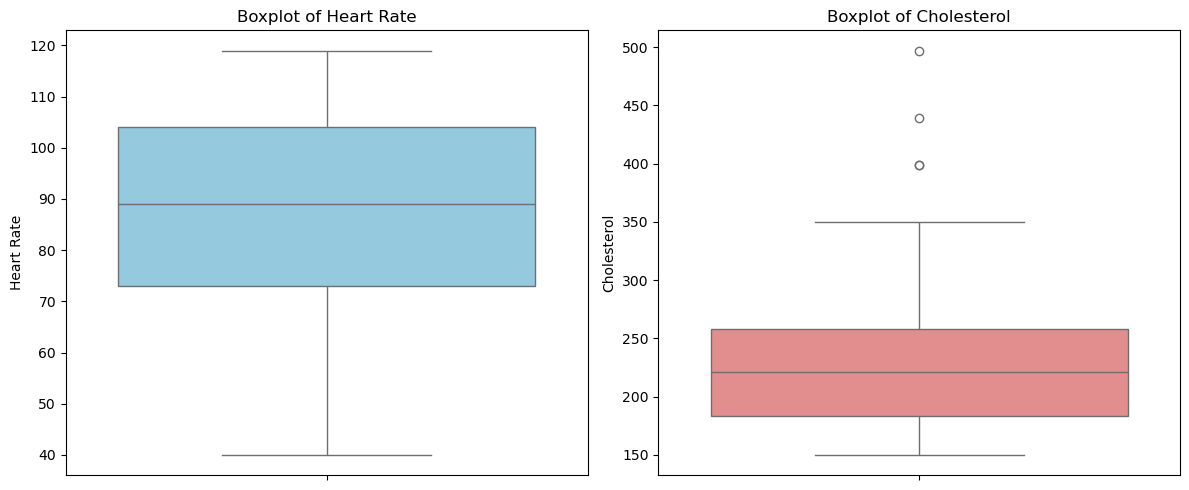

In [134]:
# Creating boxplots for Heart Rate and Cholesterol to check for outliers
plt.figure(figsize=(12, 5))

# Heart Rate Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df1["HeartRate"], color="skyblue")
plt.title("Boxplot of Heart Rate")
plt.ylabel("Heart Rate")

# Cholesterol Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df1["Cholesterol"], color="lightcoral")
plt.title("Boxplot of Cholesterol")
plt.ylabel("Cholesterol")

plt.tight_layout()
plt.show()

##### Scatter plots


 Scatter plot of age and cholesterol:


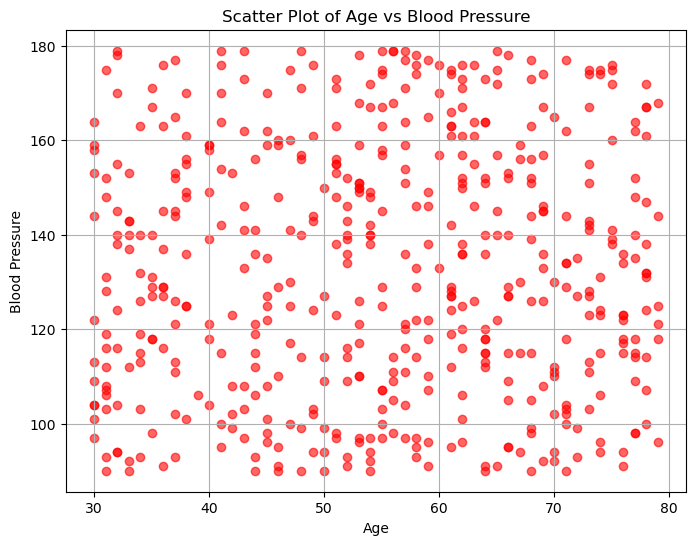

In [138]:
## Blood Pressure vs Age, as high blood pressure is often associated with aging
print("\n Scatter plot of age and cholesterol:") 

plt.figure(figsize=(8, 6))
plt.scatter(df1["Age"], df1["BloodPressure"], alpha=0.6, color="red")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("Scatter Plot of Age vs Blood Pressure")
plt.grid(True)
plt.show()

#### Heatmap -  Correlation between numerical features

Heatmap of correlation map:


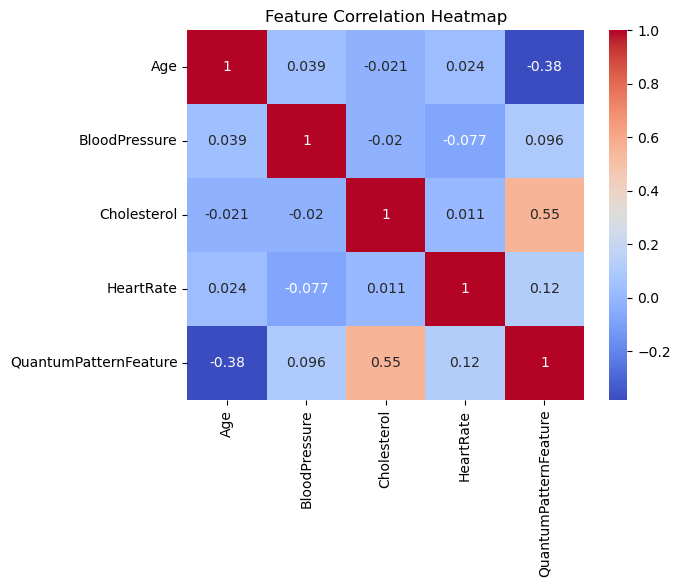

In [141]:
print("Heatmap of correlation map:")
map=df1.corr(numeric_only=True)
sns.heatmap(map,annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()